In [1]:
using Flux, MNIST, Images

INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/learning-mpc/packages/lib/v0.6/Flux.ji for module Flux.


In [2]:
x, y = traindata()

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] traindata() at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/MNIST/src/MNIST.jl:88
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] include_string(::Module, ::String, ::String) at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/Compat/src/Compat.jl:174
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/IJulia/src/execute_request.jl:154
 [7] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/Compat/src/Compat.jl:496
 [8] eventloop(::ZMQ.Socket) at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[2], in expression starting on line 1
S

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [5.0, 0.0, 4.0, 1.0, 9.0, 2.0, 1.0, 3.0, 1.0, 4.0  …  9.0, 2.0, 9.0, 5.0, 1.0, 8.0, 3.0, 5.0, 6.0, 8.0])

In [3]:
x = reshape(x, 28, 28, 1, :);
y = Flux.onehotbatch(y, 0:9)

10×60000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 false   true  false  false  false  …  false  false  false  false  false
 false  false  false   true  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false   true  false  false  false
 false  false   true  false  false     false  false  false  false  false
  true  false  false  false  false  …  false  false   true  false  false
 false  false  false  false  false     false  false  false   true  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false      true  false  false  false   true
 false  false  false  false   true     false  false  false  false  false

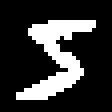

In [4]:
colorview(Gray{Float64}, x[:, :, 1, 1])

In [5]:
typeof(x)

Array{Float64,4}

In [6]:
train = [(x[:, :, :, i], y[:, i]) for i in Base.Iterators.partition(1:size(y, 2), 1000)];

In [7]:
train[1]

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[false true … false false; false false … false false; … ; false false … false false; false false … false false])

In [8]:
train[1][1]

28×28×1×1000 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0    0.0    0.0    0.0  …    0.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0  …  247.0  127.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0     195.0   64.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0      39.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0  …    0.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0    0.0    0.0    0.0       0.0    0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.

In [9]:
tx, ty = testdata()
tx = reshape(tx, 28, 28, 1, :)
ty = Flux.onehotbatch(ty, 0:9);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] testdata() at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/MNIST/src/MNIST.jl:99
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] include_string(::Module, ::String, ::String) at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/Compat/src/Compat.jl:174
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/IJulia/src/execute_request.jl:154
 [7] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/Compat/src/Compat.jl:496
 [8] eventloop(::ZMQ.Socket) at /home/rdeits/locomotion/explorations/learning-mpc/packages/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[9], in expression starting on line 1
St

In [10]:
m = Flux.Chain(
    Conv2D((2, 2), 1=>16, relu),
    x -> maxpool2d(x, 2),
    Conv2D((2, 2), 16=>8, relu),
    x -> maxpool2d(x, 2),
    x -> reshape(x, :, size(x, 4)),
    Dense(288, 10), softmax)

Chain(Conv2D((2, 2), 1=>16, NNlib.relu), #3, Conv2D((2, 2), 16=>8, NNlib.relu), #4, #5, Dense(288, 10), NNlib.softmax)

In [11]:
loss(x, y) = Flux.crossentropy(m(x), y)

loss (generic function with 1 method)

In [16]:
accuracy(x, y) = mean(Flux.argmax(m(x)) .== Flux.argmax(y))

accuracy (generic function with 1 method)

In [17]:
evalcb = Flux.throttle(() -> @show(accuracy(tx, ty)), 10)

(::throttled) (generic function with 1 method)

In [18]:
opt = ADAM(params(m))

(::#71) (generic function with 1 method)

In [38]:
Flux.train!(loss, train, opt, cb=evalcb)

accuracy(tx, ty) = 0.8866
accuracy(tx, ty) = 0.904
accuracy(tx, ty) = 0.9183
accuracy(tx, ty) = 0.9264
accuracy(tx, ty) = 0.9335
accuracy(tx, ty) = 0.9419


In [39]:
Conv2D((2, 2), 1=>1, relu)(zeros(4, 4, 1, 1))

Tracked 3×3×1×1 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [41]:
m(train[1][1][:, :, :, 1:1])

Tracked 10×1 Array{Float64,2}:
 1.22864e-5
 8.02977e-5
 0.00372642
 0.754726  
 4.60383e-7
 0.234618  
 6.3766e-6 
 0.00115189
 0.00432043
 0.00135756

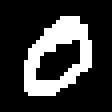

In [33]:
colorview(Gray{Float64}, train[1][1][:, :, 1, 2])